In [1]:
!pip install pandas
!pip install matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 181.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 147.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 113.7 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#Count the number of duplicate rows in the dataset.
#Display the first few duplicate rows to understand their structure.
print(df.duplicated().sum())

20


In [25]:
duplicates = df[df.duplicated(keep=False)]

# Step 2: Count the number of duplicate rows
num_duplicates = duplicates.shape[0]

# Step 3: Display the first few duplicate rows (if any)
first_few_duplicates = duplicates.head()

# Output
print(f"Number of duplicate rows: {num_duplicates}")
print("\nFirst few duplicate rows:")
print(first_few_duplicates)

Number of duplicate rows: 40

First few duplicate rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                 

In [15]:
df.duplicated().value_counts()

False    65437
True        20
Name: count, dtype: int64

In [18]:
df['MainBranch'].duplicated().value_counts()

MainBranch
True     65452
False        5
Name: count, dtype: int64

In [19]:
df['Employment'].duplicated().value_counts()

Employment
True     65347
False      110
Name: count, dtype: int64

In [20]:
df['RemoteWork'].duplicated().value_counts()

RemoteWork
True     65453
False        4
Name: count, dtype: int64

In [21]:
duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]


In [22]:
other_columns = df.columns.difference(['MainBranch', 'Employment', 'RemoteWork'])

In [23]:
identical_columns = {}
for column in other_columns:
    identical_columns[column] = duplicates[column].nunique() == 1

# Step 4: Show which columns have identical values across the duplicate rows
print("Columns with identical values across duplicates:")
for column, is_identical in identical_columns.items():
    if is_identical:
        print(f"{column}: All values are identical")

# Output the rows where duplicates were found for inspection
print("\nDuplicate rows based on subset of columns (MainBranch, Employment, RemoteWork):")
print(duplicates)

Columns with identical values across duplicates:
Check: All values are identical

Duplicate rows based on subset of columns (MainBranch, Employment, RemoteWork):
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a d

In [30]:
duplicates = df[df.duplicated(subset=['Country', 'Employment'], keep=False)]

# Count duplicates by Country
country_counts = duplicates['Country'].value_counts()

# Count duplicates by Employment
employment_counts = duplicates['Employment'].value_counts()


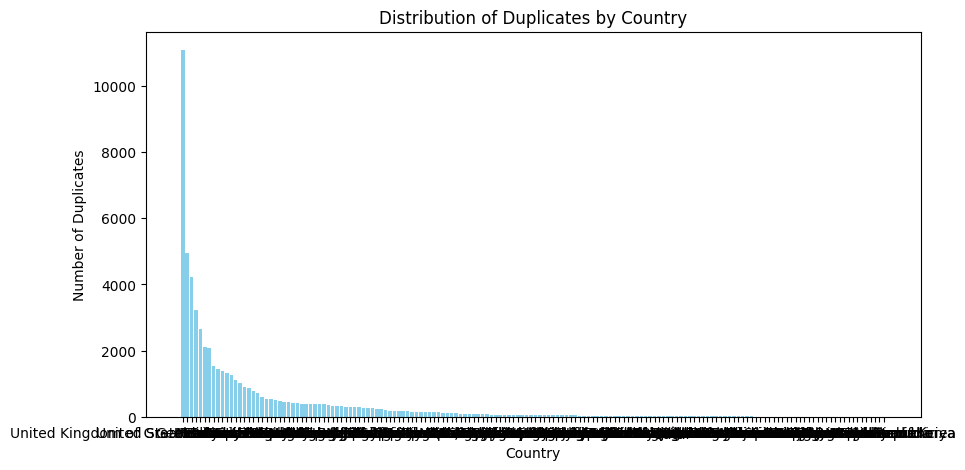

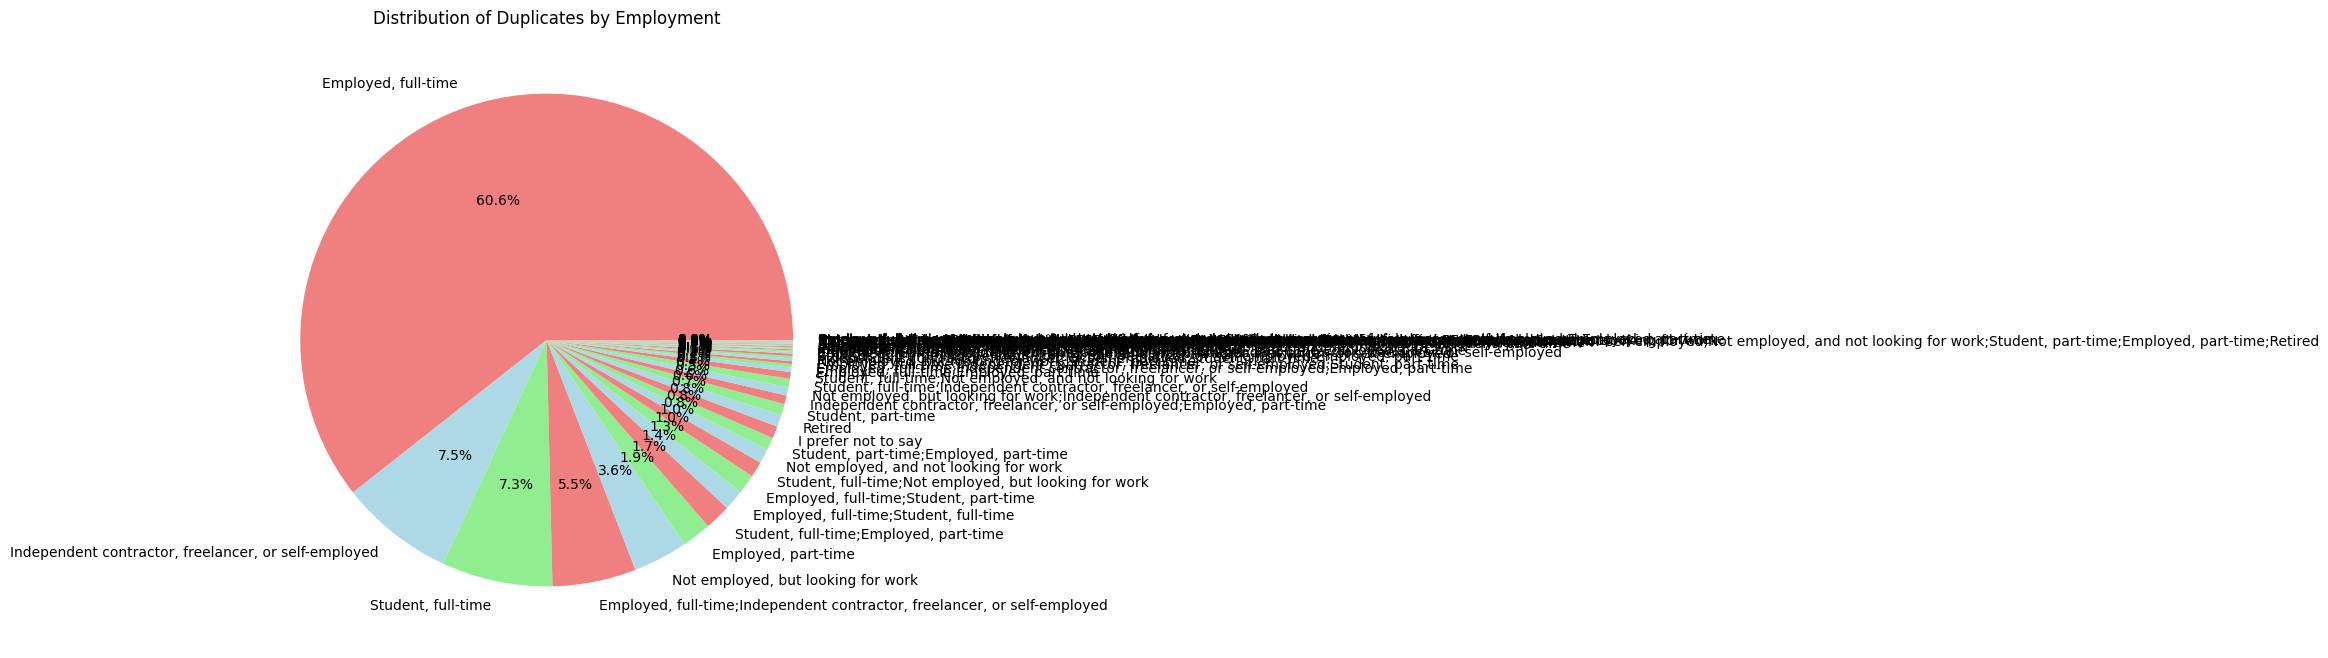

In [31]:
plt.figure(figsize=(10, 5))
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.title("Distribution of Duplicates by Country")
plt.show()

# Create pie chart for duplicates by Employment
plt.figure(figsize=(8, 8))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Distribution of Duplicates by Employment")
plt.show()

In [50]:
df.drop_duplicates(inplace=True)
df.shape

(65437, 114)

In [53]:
df.drop_duplicates(subset=['MainBranch', 'Employment','RemoteWork'], keep='last')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
1078,1079,"I am not primarily a developer, but I write co...",18-24 years old,"Independent contractor, freelancer, or self-em...",In-person,Apples,Hobby;Freelance/contract work,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
1086,1087,I am a developer by profession,Prefer not to say,"Independent contractor, freelancer, or self-em...",NaN,Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other (please specify):,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,NaN,9.0
1104,1105,I am a developer by profession,25-34 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
1483,1484,I am a developer by profession,35-44 years old,"Employed, full-time;Retired",In-person,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;On the job training;Onl...,NaN,...,20.0,0.0,30.0,15.0,5.0,5.0,Appropriate in length,Neither easy nor difficult,75000.0,3.0
1918,1919,I code primarily as a hobby,35-44 years old,"Not employed, but looking for work;Independent...",Remote,Apples,Hobby;Contribute to open-source projects;Schoo...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,65431,I am learning to code,18-24 years old,"Not employed, but looking for work;Employed, p...",In-person,Apples,Hobby;Professional development or self-paced l...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
